# [Bike Sharing](`https://learn.upgrad.com/course/4705/segment/43555/258687/790246/3970578`)

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Steps we will be following in this exercise are as follows:
 1. Reading, understanding and visualising the dataset
 2. Preparing the data for  modelling (train-test split, rescalling etc)
 3. Training the model
 4. Residual Analysis
 5. Predictions and evaluation on the test set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


## Step 1: Reading, understanding and visualising the dataset

In [2]:
biking_details = pd.read_csv("../dataset/day.csv", index_col='instant')
print(f"No. Of Records : {biking_details.shape[0]}")
print(f"No. Of Column : {biking_details.shape[1]}")
print()
biking_details.info()

No. Of Records : 730
No. Of Column : 15

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [3]:
biking_details.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


/Users/shishir_kumar/shishir/code/virtaualEnvs/conda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


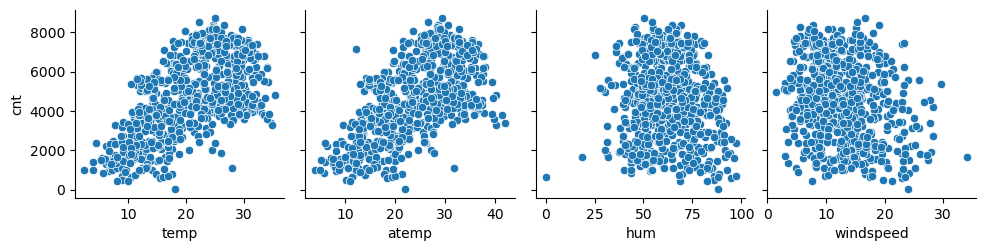

In [4]:
# visualizing numeric column
# removing casual and registered column 
numeric_column = ['temp', 'atemp', 'hum', 'windspeed']
sns.pairplot(biking_details, x_vars=numeric_column, y_vars='cnt')
plt.show()

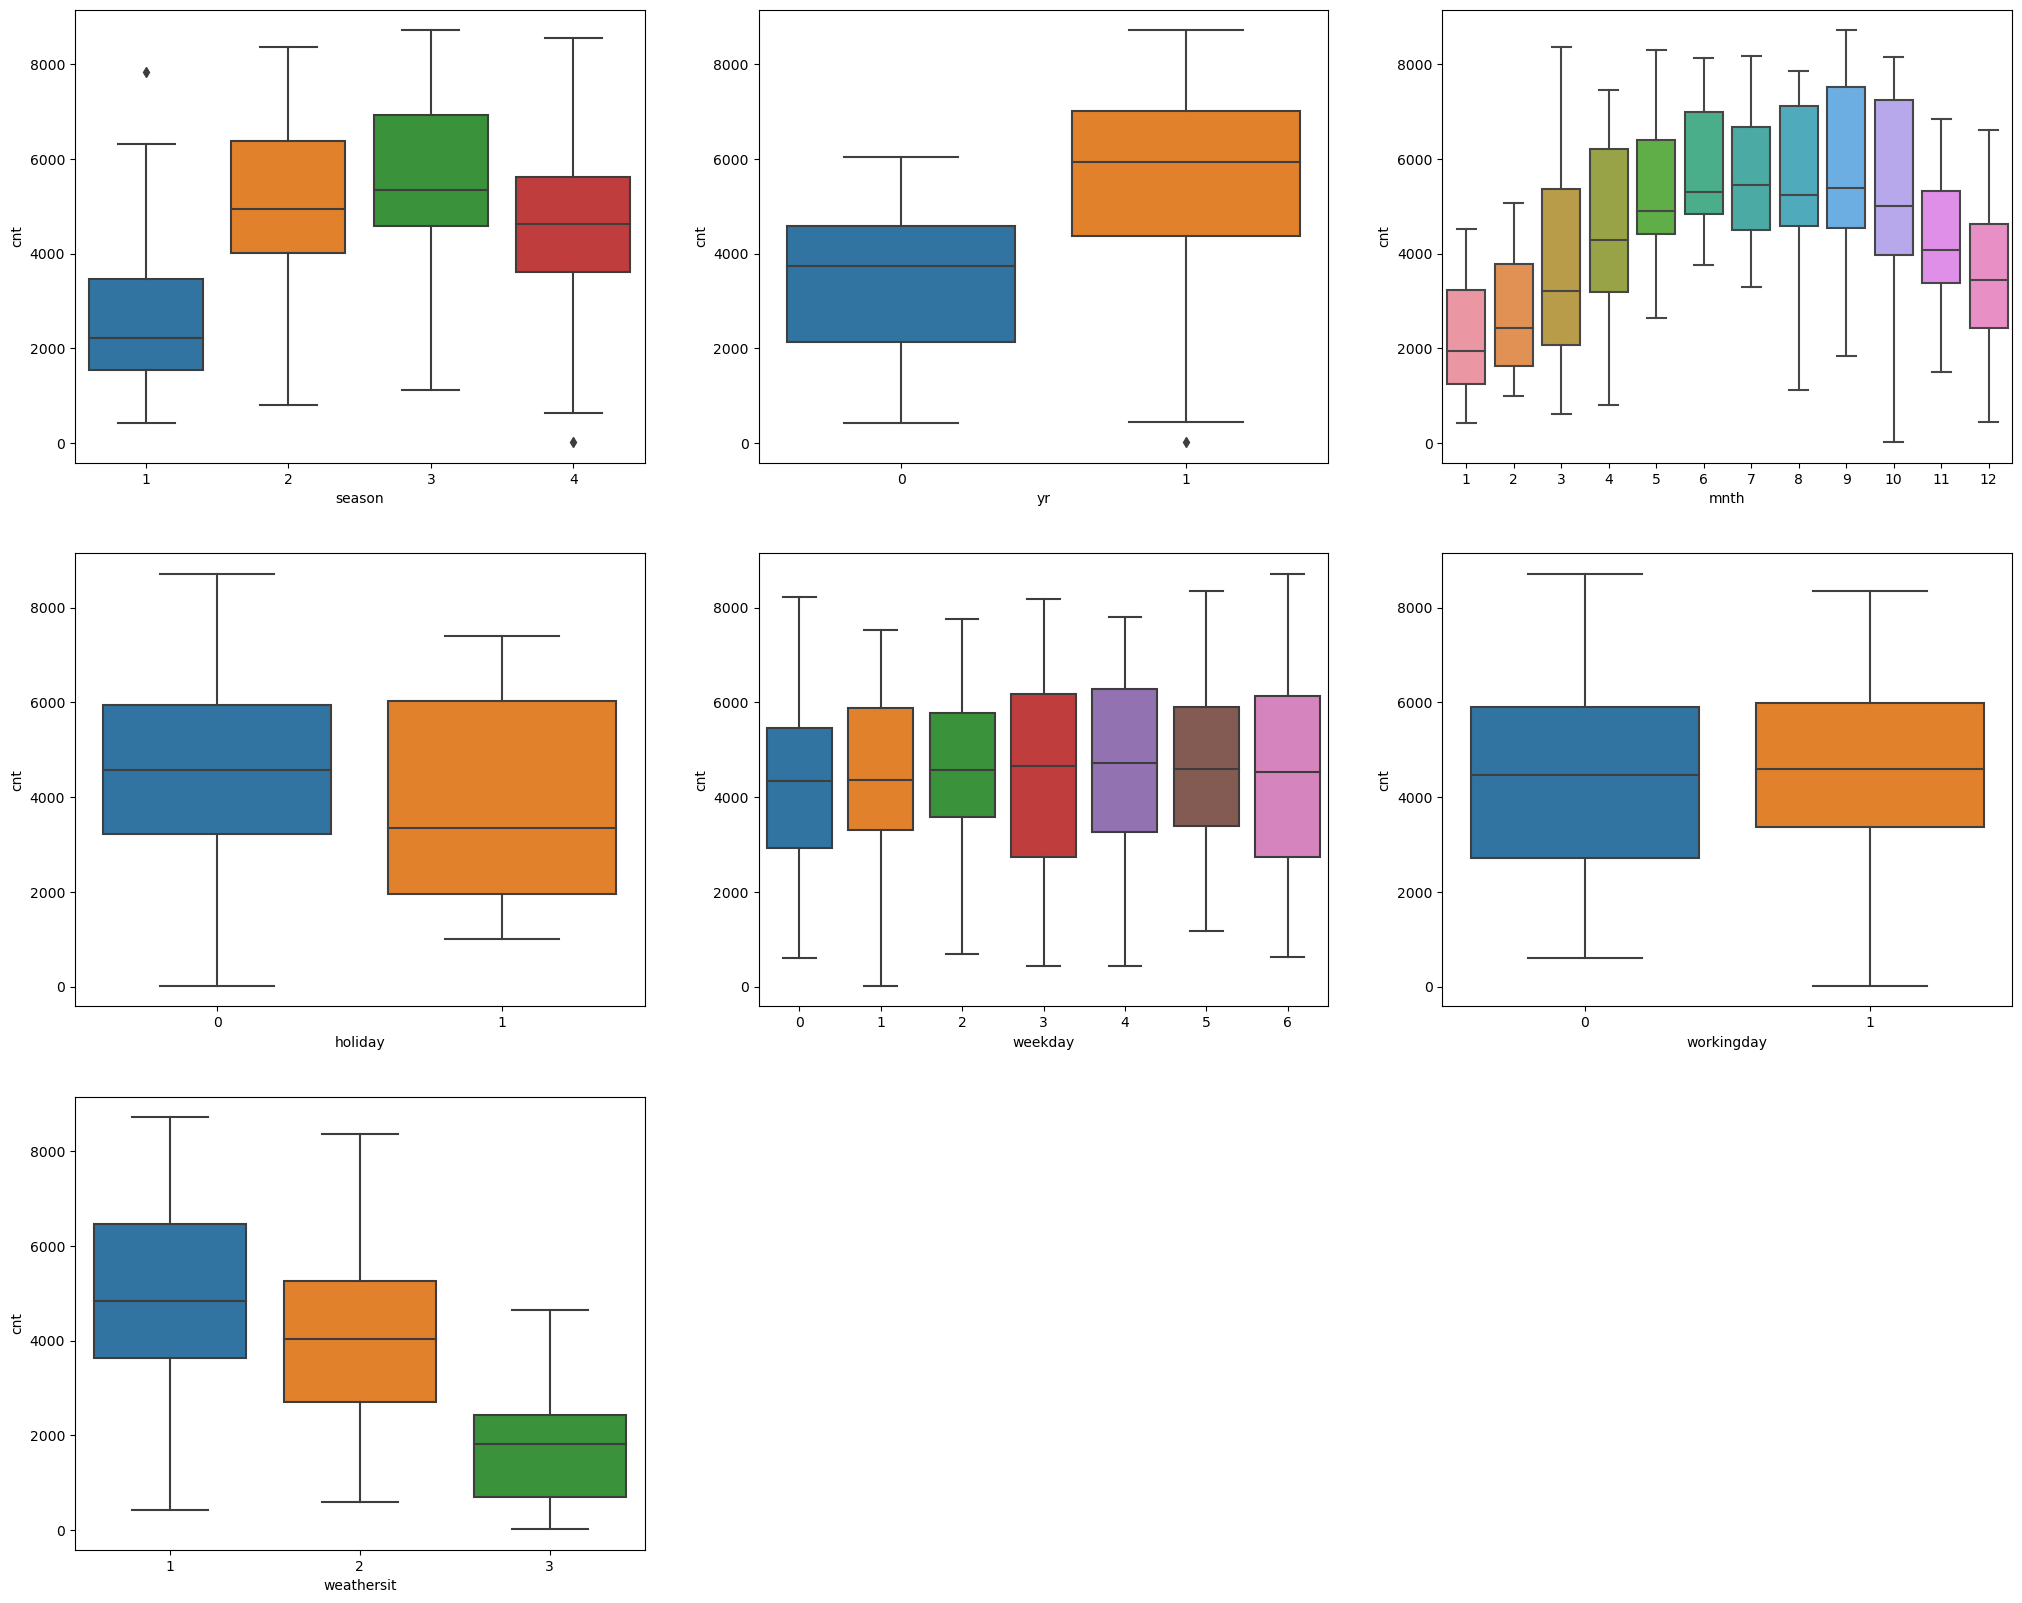

In [5]:
# visualizing categorical column
categorical_column = ['season', 'yr', 'mnth', 'holiday', 
                      'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(25, 20))
for index, col_name in enumerate(categorical_column):
    plt.subplot(3,3,index+1)
    sns.boxplot(x=col_name, y='cnt', data=biking_details)

**Observation:**<br>
Following are the observation from above pair plot:

**Quantitative Variable**
   1. temp: booking count increses with temp
   2. atemp: same as atemp
   3. hum: cnt increases with humidity
   4. windspeed: windspeed does not have that much effect of cnt
   
**Categorical Variable** 
 1. season: booking count is increasing with increase in season
 2. yr: ??
 3. mnth: for month booking count is increasing and the decreses
 4. holiday: less booking when its holiday
 5. weekday: booking count are not that much affected with increase in weekdays
 6. workingday: booking count seems same for working as well as non working day.
 7. weathersit: ??


## Step 2: Preparing the Data for Modelling
 - Encoding:
     - Converting binaries vars to 1/0
     - Other categorical vars to dummy vars
 - Splitting into train and test
 - Rescaling of variables

### Creating Dummy Variable For Below Columns
 - **season**
 - **yr**
 - **mnth**
 - **holiday**
 - **weekday**
 - **workingday**
 - **weathersit**

NOTE: Year column will create dummy variable separatly 

In [6]:
for col_name in categorical_column:
    dummy_details = pd.get_dummies(biking_details[col_name], prefix = col_name, dtype=int, drop_first=True)
    biking_details = pd.concat([biking_details, dummy_details], axis=1).drop(col_name, axis=1)


In [7]:
# dropping some unwanted columns e,g dteday, casual, registered
biking_details = biking_details.drop(['dteday', 'casual', 'registered'], axis = 1)
biking_details.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


**Creating test and train set**

In [8]:
df_train, df_test = train_test_split(biking_details, train_size=0.7, random_state=100)
print(f"train size : {df_train.shape}")
print(f"test size : {df_test.shape}")

train size : (510, 30)
test size : (220, 30)


**Approch for rescaling the Features**
   - Min-Max Scaling(normalization): Between 0 and 1: (x - xmin)/(xmax-xmin)
   - Standardisation(mean-0, sigma-1): standardisation: (x - mu)/sigma
  
we will be following **normalization** for rescale our feature

In [9]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# create list of numeric variable
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,0.815169,0.766351,0.725633,0.264686,7216,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
427,0.442393,0.438975,0.640189,0.255342,4066,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
729,0.245101,0.200348,0.498067,0.663106,1796,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
483,0.395666,0.391735,0.504508,0.188475,4220,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
112,0.345824,0.318819,0.751824,0.380981,1683,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


## Step-3: Training the model

<Axes: >

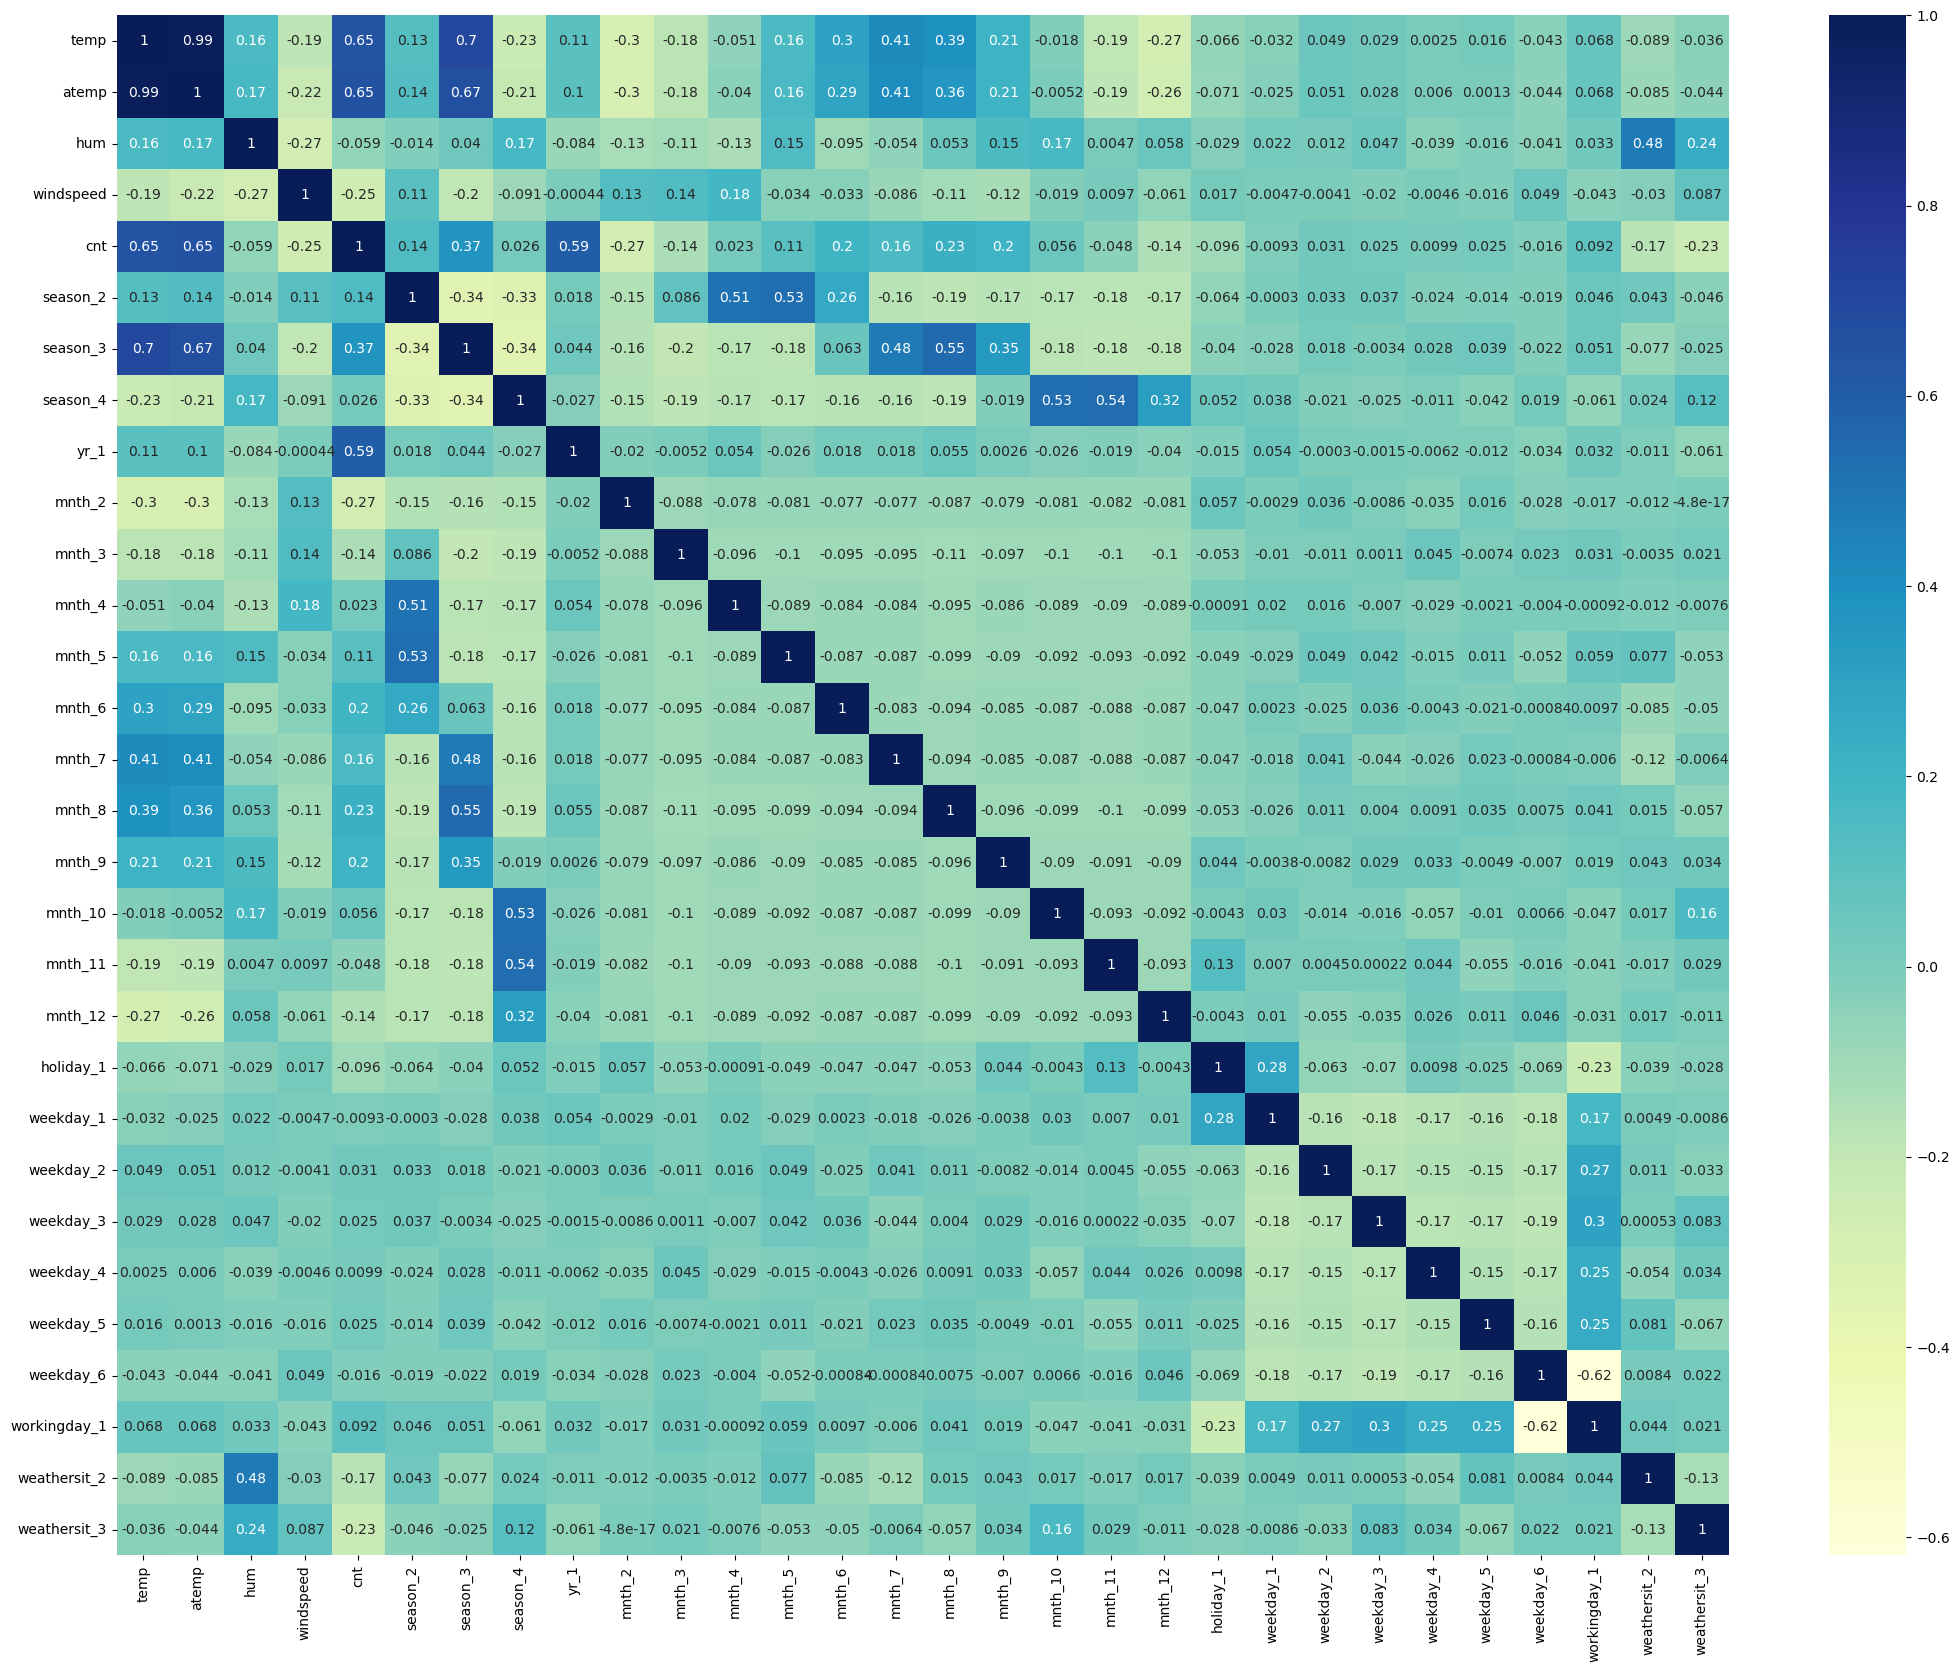

In [10]:
# heatmap
plt.figure(figsize=(26,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

correleation between **temp** and **atemp** is very high **0.99**
this means that both variable are linearly related to each other so we can safely drop one of them 

In [11]:
df_train = df_train.drop('atemp', axis=1)

We will first add all the features and will check P-value and VIF and using below rules we will decide whether to remove any feature or not

We generally have these kind of cases
- High p-value, high VIF : <b>Drop these 
- High-Low
    - High p, low VIF : <b>Remove these first
    - Low p, high VIF: <b> Remove these after the above
- Low p, low VIF
    
    

In [12]:
y_train = df_train.pop('cnt')
x_train = df_train


In [13]:
# add a constant
x_train_sm = sm.add_constant(x_train)

# create first model
lr = sm.OLS(y_train, x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.00e-181
Time:                        21:41:21   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1554.3209    264.335      5.880      0.000    1034.929    2073.713
temp          3871.0579    402.069      9.628      0.000    3081.034    4661.082
hum          -1316.6056    335.084     -3.929      0.000   -1975.011    -658.201
windspeed    -1616.8029    223.739     -7.226      0.000   -2056.426   -1177.179
season_2       763.4684    205.191      3.721      0.000     360.289    1166.648
season_3       389.6974    260.487      1.496      0.135    -122.133     901.528
season_4      1325.2312    225.665      5.873      0.000     881.822    1768.640
yr_1          2020.3471     70.106     28.819      0.000    1882.596    2158.098
mnth_2         268.3519    179.317      1.497      0.135     -83.987     620.691
mnth_3         561.4072    194.418      2.888      0.004     179.396     943.419
mnth_4         550.3311    291.912      1.885      0.060     -23.245    1123.908
mnth_5         764.7892    314.376      2.433      0.015     147.072    1382.506
mnth_6         590.3350    336.893      1.752      0.080     -71.625    1252.295
mnth_7         256.1257    380.989      0.672      0.502    -492.478    1004.730
mnth_8         727.4415    362.125      2.009      0.045      15.903    1438.980
mnth_9        1297.3030    324.601      3.997      0.000     659.495    1935.111
mnth_10        615.9209    299.769      2.055      0.040      26.906    1204.936
mnth_11        203.7027    285.445      0.714      0.476    -357.167     764.572
mnth_12        165.4781    230.313      0.718      0.473    -287.064     618.020
holiday_1     -367.6430    205.210     -1.792      0.074    -770.860      35.574
weekday_1      -86.2703     84.537     -1.021      0.308    -252.376      79.836
weekday_2      -60.1949     96.986     -0.621      0.535    -250.762     130.373
weekday_3       47.8985     91.382      0.524      0.600    -131.658     227.455
weekday_4       16.2987     94.993      0.172      0.864    -170.353     202.950
weekday_5       95.6618     96.885      0.987      0.324     -94.708     286.032
weekday_6      471.2822    126.282      3.732      0.000     223.152     719.413
workingday_1   381.0368     81.423      4.680      0.000     221.048     541.025
weathersit_2  -517.6165     90.664     -5.709      0.000    -695.761    -339.472
weathersit_3 -2223.7163    229.263     -9.699      0.000   -2674.195   -1773.238
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.49e+15
==============================================================================

Notes:
[1] Stand

In [14]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train, i) 
             for i in range(x_train.shape[1])]

#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

/Users/shishir_kumar/shishir/code/virtaualEnvs/conda/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
18,holiday_1,inf
25,workingday_1,inf
23,weekday_5,inf
22,weekday_4,inf
21,weekday_3,inf
20,weekday_2,inf
19,weekday_1,inf
0,temp,46.866101
1,hum,20.658781
4,season_3,15.345135


Here we can observe that for some of the columns VIF is inf this means that there is some colinearity between columns and holiday_1, workingday_1 and others might be explained by some combination of other columns

We will drop one column at a time and will recalculate VIF and P-value 

In [15]:
x_train.columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [16]:
# this list is populated by manually dropping on column at a time and checking VIF and p-value
col_to_drop = ['holiday_1', 'temp', 'workingday_1', 'hum', 'season_3', 'season_4', 'season_2']
X = x_train.drop(col_to_drop, axis=1)

In [17]:

x_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     96.83
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.40e-159
Time:                        21:41:21   Log-Likelihood:                -4168.1
No. Observations:                 510   AIC:                             8380.
Df Residuals:                     488   BIC:                             8473.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1536.0402    187.660      8.185      0.000    1167.320    1904.761
windspeed    -1658.0496    242.960     -6.824      0.000   -2135.427   -1180.672
yr_1          2165.6594     78.275     27.667      0.000    2011.861    2319.458
mnth_2         580.7705    200.904      2.891      0.004     186.027     975.514
mnth_3        1654.9322    181.352      9.126      0.000    1298.605    2011.260
mnth_4        2445.1368    192.732     12.687      0.000    2066.450    2823.824
mnth_5        3123.1792    187.659     16.643      0.000    2754.460    3491.898
mnth_6        3381.8800    193.028     17.520      0.000    3002.611    3761.149
mnth_7        3116.9033    194.404     16.033      0.000    2734.931    3498.876
mnth_8        3325.0244    182.149     18.254      0.000    2967.132    3682.917
mnth_9        3610.0239    190.682     18.932      0.000    3235.365    3984.683
mnth_10       3041.3345    189.454     16.053      0.000    2669.089    3413.580
mnth_11       2135.9925    186.648     11.444      0.000    1769.259    2502.726
mnth_12       1492.7043    187.472      7.962      0.000    1124.353    1861.056
weekday_1      251.3982    143.635      1.750      0.081     -30.822     533.618
weekday_2      407.1734    148.915      2.734      0.006     114.580     699.767
weekday_3      491.5540    142.812      3.442      0.001     210.951     772.157
weekday_4      455.8083    149.086      3.057      0.002     162.878     748.739
weekday_5      524.3653    150.543      3.483      0.001     228.573     820.157
weekday_6      511.1891    143.247      3.569      0.000     229.733     792.645
weathersit_2  -720.4015     84.091     -8.567      0.000    -885.627    -555.176
weathersit_3 -2565.4620    238.794    -10.743      0.000   -3034.653   -2096.271
==============================================================================
Omnibus:                       89.267   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.143
Skew:                          -0.798   Prob(JB):                     1.63e-63
Kurtosis:                       6.325   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
             for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,windspeed,4.25
1,yr_1,1.98
15,weekday_3,1.80
18,weekday_6,1.79
13,weekday_1,1.74
14,weekday_2,1.68
3,mnth_3,1.68
16,weekday_4,1.67
17,weekday_5,1.65
4,mnth_4,1.59


After dropping columns which has high VIF values, we finally get all VIF less then 5 and R sq. and Adj R-sq. is 0.8. We will stop here

## Step-4: Residual Analysis

In [19]:
y_train_pred = lr_model.predict(x_train_sm)

/var/folders/h5/h1tlh3sd2rs2nzc3pp2hn8480000gn/T/ipykernel_61165/3911317030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

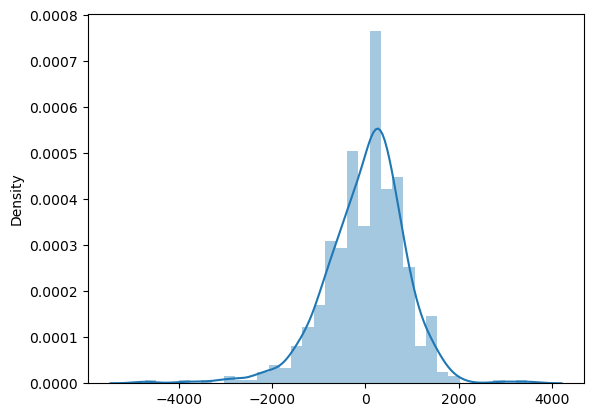

In [20]:
res = y_train - y_train_pred
sns.distplot(res)

## Step 5: Predictions and evaluation on the test set

In [21]:
# num_vars = ['area', 'bedrooms', 'bathrooms', 'stories',
#             'parking', 'price']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
185,0.831783,0.769660,0.657364,0.084219,6043,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
536,0.901354,0.842587,0.610133,0.153728,6211,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
300,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
222,0.881625,0.795343,0.437098,0.339570,4780,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
153,0.817246,0.741471,0.314298,0.537414,4968,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
y_test = df_test.pop('cnt')
x_test = df_test

In [23]:
x_test = x_test.drop('atemp', axis=1)
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
185,1.0,0.831783,0.657364,0.084219,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
536,1.0,0.901354,0.610133,0.153728,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
300,1.0,0.511964,0.837699,0.334206,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
222,1.0,0.881625,0.437098,0.339570,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
153,1.0,0.817246,0.314298,0.537414,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [24]:
x_test_sm = x_test_sm.drop(col_to_drop, axis=1)

In [25]:
#predict
y_test_pred = lr_model.predict(x_test_sm)


In [26]:
# evaluate
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7658734302277231

In [30]:
lr_model.params

const           1536.040185
windspeed      -1658.049582
yr_1            2165.659438
mnth_2           580.770532
mnth_3          1654.932191
mnth_4          2445.136811
mnth_5          3123.179176
mnth_6          3381.879966
mnth_7          3116.903300
mnth_8          3325.024410
mnth_9          3610.023934
mnth_10         3041.334471
mnth_11         2135.992486
mnth_12         1492.704330
weekday_1        251.398197
weekday_2        407.173370
weekday_3        491.554037
weekday_4        455.808267
weekday_5        524.365304
weekday_6        511.189090
weathersit_2    -720.401534
weathersit_3   -2565.461970
dtype: float64

In [ ]:
!echo "# Bike-Sharing-MLR" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin git@github.com:shishir-kr92/Bike-Sharing-MLR.git
!git push -u origin main